In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataFrame = pd.read_csv('/home/anonymous/ReviewPaper/DataSet/healthcare-dataset-stroke-data.csv')
dataFrame = dataFrame.drop(columns='id')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_columns',None)
dataFrame.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
 dataFrame.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
dataFrame.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

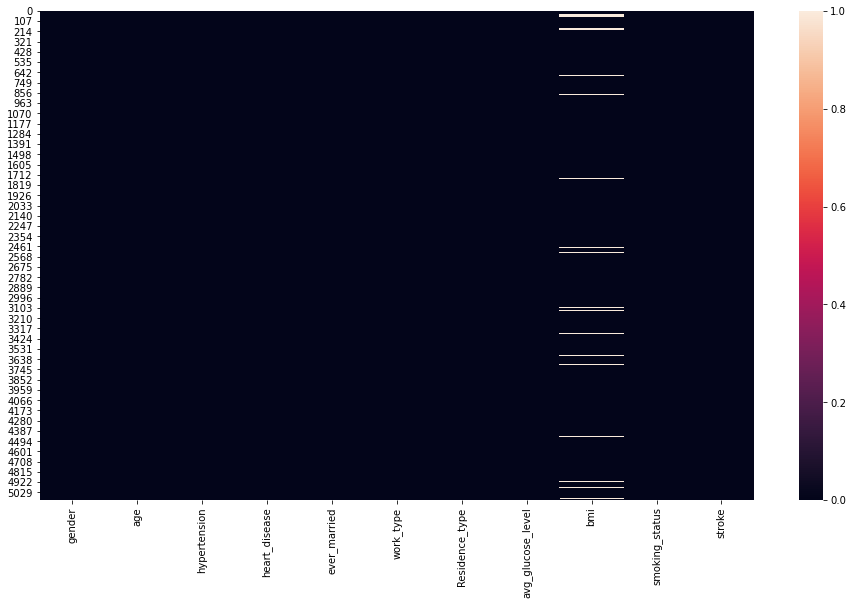

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(dataFrame.isnull())

In [7]:
missing_value_per = dataFrame.isnull().sum()/dataFrame.shape[0]*100
missing_value_per

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
numeric_df = dataFrame.select_dtypes(include=['int64','float64'])
numeric_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [9]:
missing_num_var = [var for var in numeric_df.columns if numeric_df[var].isnull().sum() > 0]
missing_num_var

['bmi']

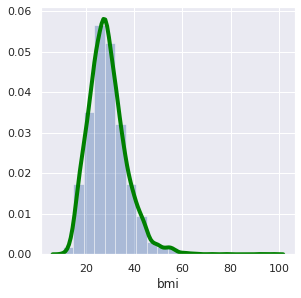

In [10]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(numeric_df[var], bins=20, kde_kws={'linewidth':4, 'color':'green'})

In [11]:
mean_var = numeric_df.fillna(numeric_df.mean())
mean_var.isnull().sum().sum()

0

In [12]:
median_var = numeric_df.fillna(numeric_df.median())
median_var.isnull().sum().sum()

0

No handles with labels found to put in legend.


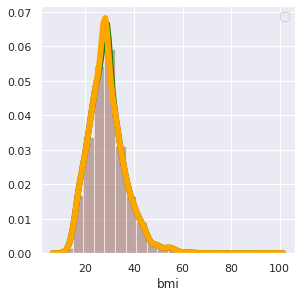

In [13]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(mean_var[var], bins=20, kde_kws={'linewidth':6, 'color':'green'})
    sns.distplot(median_var[var], bins=20, kde_kws={'linewidth':6, 'color':'Orange'}) 
    plt.legend()

/home/anonymous/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/anonymous/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/anonymous/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/anonymous/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


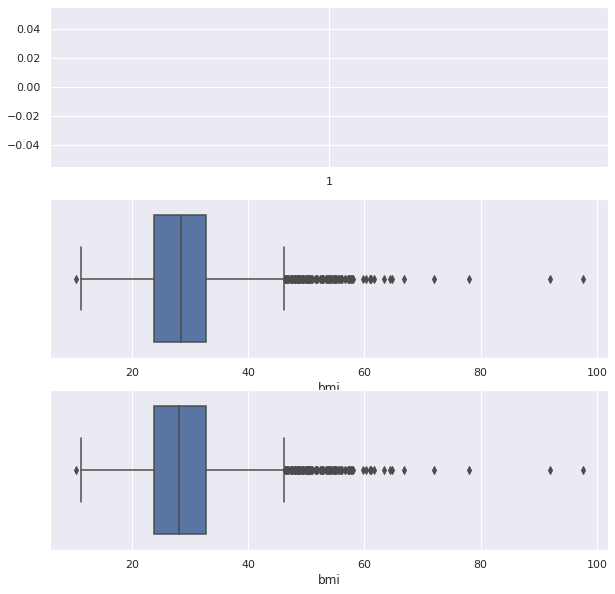

In [14]:
for i, var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    plt.boxplot(dataFrame[var])
    plt.subplot(3,1,2)
    sns.boxplot(mean_var[var])
    plt.subplot(3,1,3)
    sns.boxplot(median_var[var])

In [15]:
dataFrame['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [16]:
mean_df = dataFrame.copy()
cat_vars = ['gender']
for cat_var, num_var_miss in zip(cat_vars, 'bmi'):
    for var_class in dataFrame[cat_var].unique():
        mean_df.update(dataFrame[dataFrame.loc[:, cat_var] == var_class]['bmi'].replace(np.nan,dataFrame[dataFrame.loc[:,cat_var] == var_class]['bmi'].mean()))   


In [17]:
median_df = dataFrame.copy()
cat_vars = ['gender']
for cat_var, num_var_miss in zip(cat_vars, 'bmi'):
    for var_class in dataFrame[cat_var].unique():
        median_df.update(dataFrame[dataFrame.loc[:, cat_var] == var_class]['bmi'].replace(np.nan,dataFrame[dataFrame.loc[:,cat_var] == var_class]['bmi'].median()))   

No handles with labels found to put in legend.


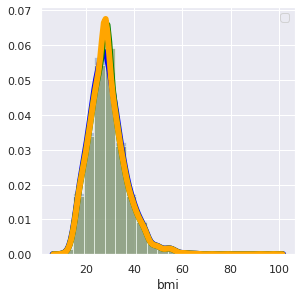

In [18]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(dataFrame[var], bins=20, kde_kws={'linewidth':6, 'color':'blue'})
    sns.distplot(mean_df[var], bins=20, kde_kws={'linewidth':6, 'color':'green'})
    sns.distplot(median_df[var], bins=20, kde_kws={'linewidth':6, 'color':'Orange'}) 
    plt.legend()

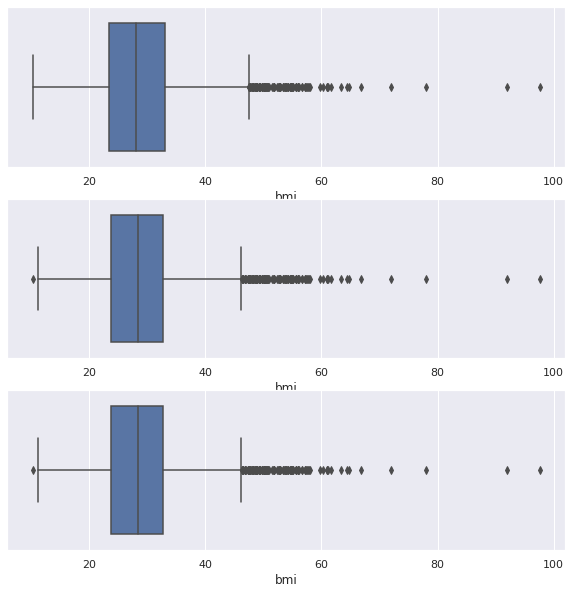

In [19]:
for i, var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(dataFrame[var])
    plt.subplot(3,1,2)
    sns.boxplot(mean_df[var])
    plt.subplot(3,1,3)
    sns.boxplot(mean_var[var])

In [20]:
dataFrame = mean_df
independent_var = dataFrame.iloc[:,:-1]
dependent_var = dataFrame.iloc[:, -1]
dependent_var = dependent_var.to_frame()

In [21]:
independent_var

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
one_hot_encoding = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), 
  ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status'])], 
                                     remainder='passthrough')
independent_var = np.array(one_hot_encoding.fit_transform(independent_var))
independent_var

array([[  1.        ,   0.        ,   1.        , ...,   1.        ,
        228.69      ,  36.6       ],
       [  0.        ,   0.        ,   1.        , ...,   0.        ,
        202.21      ,  29.06575768],
       [  1.        ,   0.        ,   1.        , ...,   1.        ,
        105.92      ,  32.5       ],
       ...,
       [  0.        ,   0.        ,   1.        , ...,   0.        ,
         82.99      ,  30.6       ],
       [  1.        ,   0.        ,   1.        , ...,   0.        ,
        166.29      ,  25.6       ],
       [  0.        ,   0.        ,   1.        , ...,   0.        ,
         85.28      ,  26.2       ]])

In [24]:
pd.DataFrame(independent_var, columns=['gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes','age','hypertension','heart_disease','avg_glucose_level','bmi',])  

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.600000
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0,0.0,202.21,29.065758
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.500000
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.400000
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,80.0,1.0,0.0,83.75,29.065758
5106,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,81.0,0.0,0.0,125.20,40.000000
5107,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,82.99,30.600000
5108,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,166.29,25.600000


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(independent_var, dependent_var, 
                                                    test_size=0.2, random_state=11)

In [27]:
X_train=pd.DataFrame(X_train, columns=['gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes','age','hypertension','heart_disease','avg_glucose_level','bmi',])

In [28]:
from sklearn.preprocessing import StandardScaler
temp_df = X_train.copy()
SS = StandardScaler()
column = ['avg_glucose_level','bmi','age']
temp_df = pd.DataFrame(SS.fit_transform(temp_df[column]), columns=column)
X_train = X_train.drop(columns=column,axis=1)
X_train=pd.concat([X_train, temp_df], axis=1)

In [29]:
X_test=pd.DataFrame(X_test, columns=['gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes','age','hypertension','heart_disease','avg_glucose_level','bmi',])

In [30]:
temp_df1 = X_test.copy()
SS = StandardScaler()
column = ['avg_glucose_level','bmi','age']
temp_df1 = pd.DataFrame(SS.fit_transform(temp_df1[column]), columns=column)
X_test = X_test.drop(columns=column,axis=1)
X_test = pd.concat([X_test, temp_df1], axis=1)

In [31]:
X_train

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension,heart_disease,avg_glucose_level,bmi,age
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.377506,-0.728912,-0.144770
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.831105,0.099677,-0.412649
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.752849,-0.690072,1.596443
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.463015,0.099677,0.882099
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.627106,0.319771,0.926746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.767083,-0.392298,-0.457295
4084,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.715394,-0.036531,0.123109
4085,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.049666,0.242091,-0.234063
4086,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.491998,-0.974900,0.882099


In [32]:
X_test

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension,heart_disease,avg_glucose_level,bmi,age
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.477149,0.495879,-0.433562
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.188359,-1.480894,-1.807274
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.706690,-0.031260,1.528885
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.040451,-0.334366,1.059604
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.724806,1.655586,-0.902842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.106730,1.194339,1.144928
1018,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.286612,-1.836713,-1.820926
1019,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.130483,-0.294830,1.230252
1020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.504739,-0.057617,0.163705


In [33]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)

In [34]:
from sklearn.linear_model import LogisticRegression
classfier = LogisticRegression(random_state=0)
classfier.fit(X_train, np.ravel(Y_train))

LogisticRegression(random_state=0)

In [35]:
predicted_Value_LR = classfier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
c_matrix_LR = confusion_matrix(Y_test, predicted_Value_LR)
print(c_matrix_LR)
accuracy_score(Y_test, predicted_Value_LR)

[[967   0]
 [ 55   0]]


0.9461839530332681

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, np.ravel(Y_train))

KNeighborsClassifier()

In [38]:
predicted_Value_KNN = classifier1.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
c_matrix_KNN = confusion_matrix(Y_test, predicted_Value_KNN)
print(c_matrix_KNN)
accuracy_score(Y_test, predicted_Value_KNN)

[[962   5]
 [ 55   0]]


0.9412915851272016

In [40]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, np.ravel(Y_train))

SVC(kernel='linear', random_state=0)

In [41]:
predicted_Value_SVC = classifier2.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
c_matrix_SVC = confusion_matrix(Y_test, predicted_Value_SVC)
print(c_matrix_SVC)
accuracy_score(Y_test, predicted_Value_SVC)

[[967   0]
 [ 55   0]]


0.9461839530332681

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
predicted_Value_DT = classifier3.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
c_matrix_DT = confusion_matrix(Y_test, predicted_Value_DT)
print(c_matrix_DT)
accuracy_score(Y_test, predicted_Value_DT)

[[923  44]
 [ 47   8]]


0.910958904109589

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, np.ravel(Y_train))

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [47]:
predicted_Value_RF = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
c_matrix_RF = confusion_matrix(Y_test, predicted_Value_RF)
print(c_matrix_RF)
accuracy_score(Y_test, predicted_Value_RF)

[[963   4]
 [ 54   1]]


0.9432485322896281